# <center> 利用LSTM对股价进行预测

## step 0:导入相应的模块
<br/>
<font size=3>
&emsp;其中包括数据处理模块numpy和pandas，用于存放相应的数据与标签<br/>
&emsp;以及Tensorflow.Keras的神经网络相关API

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.optimizers import SGD

## step 1:准备数据

<br/>
<font size=3>
&emsp;用苹果公司1998年初到2018年末的开盘价(Open)作为dataset<br/>
&emsp;&emsp;&emsp;用<br/>

In [4]:
dataset = pd.read_csv("AAPL.csv",
                      index_col="Date",
                     )
dataset

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
1998-01-02,0,13.63,16.2500,13.5000,16.25,6411700.0
1998-01-05,1,16.50,16.5600,15.1900,15.88,5820300.0
1998-01-06,2,15.94,20.0000,14.7500,18.94,16182800.0
1998-01-07,3,18.81,19.0000,17.3100,17.50,9300200.0
1998-01-08,4,17.44,18.6200,16.9400,18.19,6910900.0
...,...,...,...,...,...,...
2018-11-12,5250,199.00,199.8500,193.7900,194.17,51135518.0
2018-11-13,5251,191.63,197.1800,191.4501,192.23,46882936.0
2018-11-14,5252,193.90,194.4800,185.9300,186.80,60800957.0


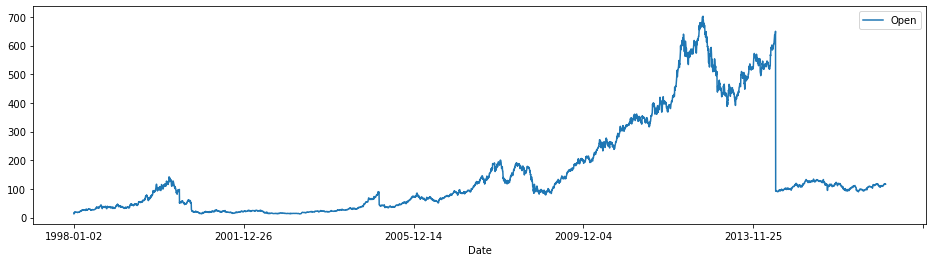

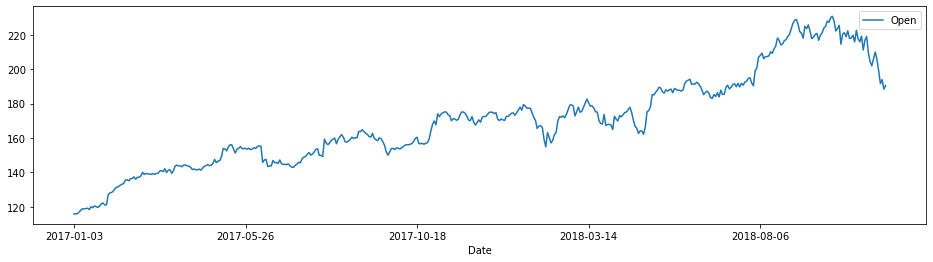

In [5]:
train_set=dataset[:'2017'].iloc[:,1:2]
test_set=dataset['2017':].iloc[:,1:2]       #截取“Open”一列的数据


train_set.plot(figsize=(16,4),legend=True)
test_set.plot(figsize=(16,4),legend=True)
plt.show()

## step 3:

In [4]:
#正则化
sc = MinMaxScaler(feature_range=[0,1])
train_set_scaled=sc.fit_transform(train_set)
train_set_scaled.shape

(4781, 1)

In [5]:
X_train=[]
y_train=[]

for i in range(60,4781):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])

X_train=np.array(X_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
y_train=np.array(y_train)

In [6]:
X_train[0].shape

(60, 1)

In [7]:
#LSTM
model = Sequential()

#1
model.add(LSTM(50,return_sequences=True,
               input_shape=(X_train.shape[1],1)
              )
         )
model.add(Dropout(0.2))

#2
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

#3
model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [9]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
148/148 [==============================] - 21s 141ms/step - loss: 0.0051
Epoch 2/20
148/148 [==============================] - 21s 140ms/step - loss: 0.0030
Epoch 3/20
148/148 [==============================] - 18s 122ms/step - loss: 0.0025
Epoch 4/20
148/148 [==============================] - 21s 142ms/step - loss: 0.0022
Epoch 5/20
148/148 [==============================] - 20s 136ms/step - loss: 0.0019
Epoch 6/20
148/148 [==============================] - 19s 129ms/step - loss: 0.0015
Epoch 7/20
148/148 [==============================] - 20s 133ms/step - loss: 0.0016
Epoch 8/20
148/148 [==============================] - 18s 120ms/step - loss: 0.0016
Epoch 9/20
148/148 [==============================] - 22s 149ms/step - loss: 0.0015
Epoch 10/20
148/148 [==============================] - 20s 138ms/step - loss: 0.0015
Epoch 11/20
148/148 [==============================] - 19s 130ms/step - loss: 0.0013
Epoch 12/20
148/148 [==============================] - 21s 142ms/step - lo

In [10]:
inputs=test_set[:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs.shape

(474, 1)

In [11]:
X_test=[]
for i in range(60,474):
    X_test.append(inputs[i-60:i,0])
    
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(414, 60, 1)

In [12]:
model.load_weights(filepath="model.h5")


In [13]:
predict_test=model.predict(X_test)
result=sc.inverse_transform(predict_test)
result.shape

(414, 1)

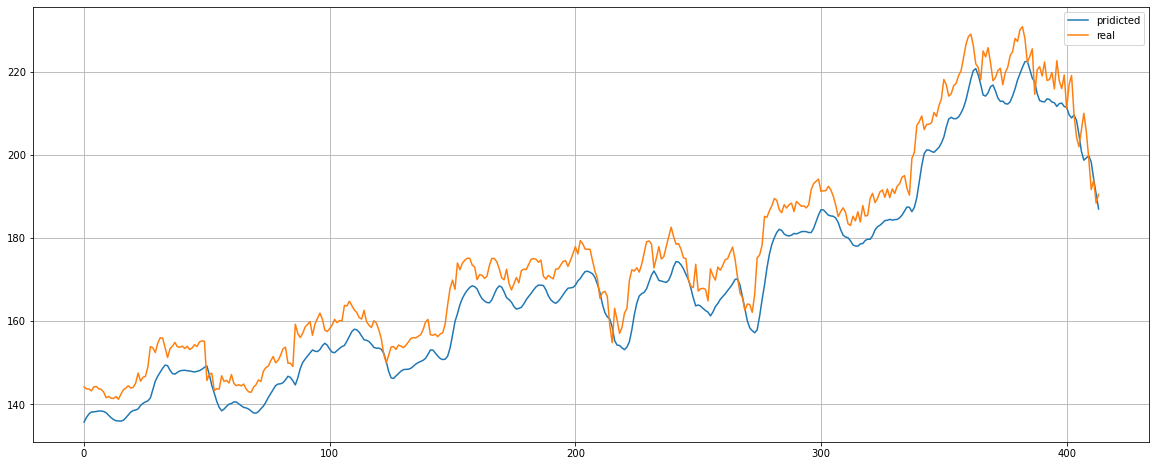

In [14]:
dataset[5255-414:]
plt.figure(figsize=(20,8))
date=dataset[5255-414:].iloc[:,0:0]
result_test=test_set[60:]

plt.plot(result,label="pridicted")
plt.plot(result_test.values,label="real")
plt.legend()
plt.grid()
plt.show()

In [15]:
model.save_weights(filepath="model.h5")